In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
x = np.linspace(0, 10, 100)
y = np.sin(x)
y_noise = [y_item + np.random.choice([-1, 1])*np.random.random() for y_item in y]

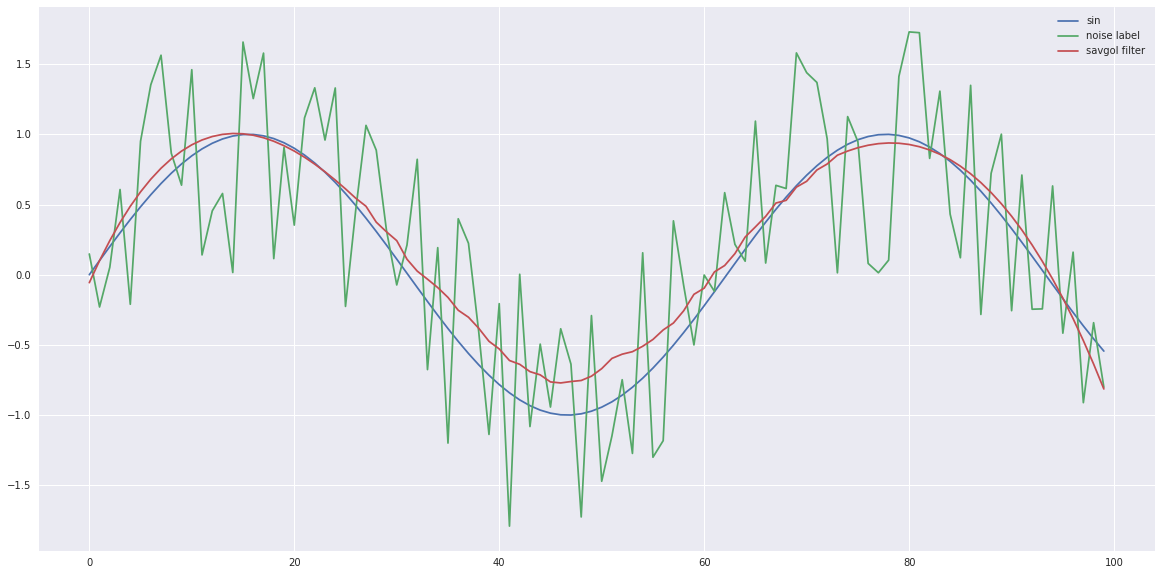

In [4]:
plt.figure(figsize=(20,10))
plt.plot(y,label='sin')
plt.plot(y_noise,label='noise label')
plt.plot(signal.savgol_filter(y_noise, 53, 3),label='savgol filter')
plt.legend()
plt.show()

In [9]:
def smoothTriangle(data, degree, dropVals=False):
    triangle=np.array(np.arange(degree) + [degree] + range(degree)[::-1]) + 1
    smoothed=[]

    for i in range(degree, len(data) - degree * 2):
        point=data[i:i + len(triangle)] * triangle
        smoothed.append(sum(point)/sum(triangle))
    if dropVals:
        return smoothed
    smoothed=[smoothed[0]]*int(degree + degree/2) + smoothed
    while len(smoothed) < len(data):
        smoothed.append(smoothed[-1])
    return smoothed

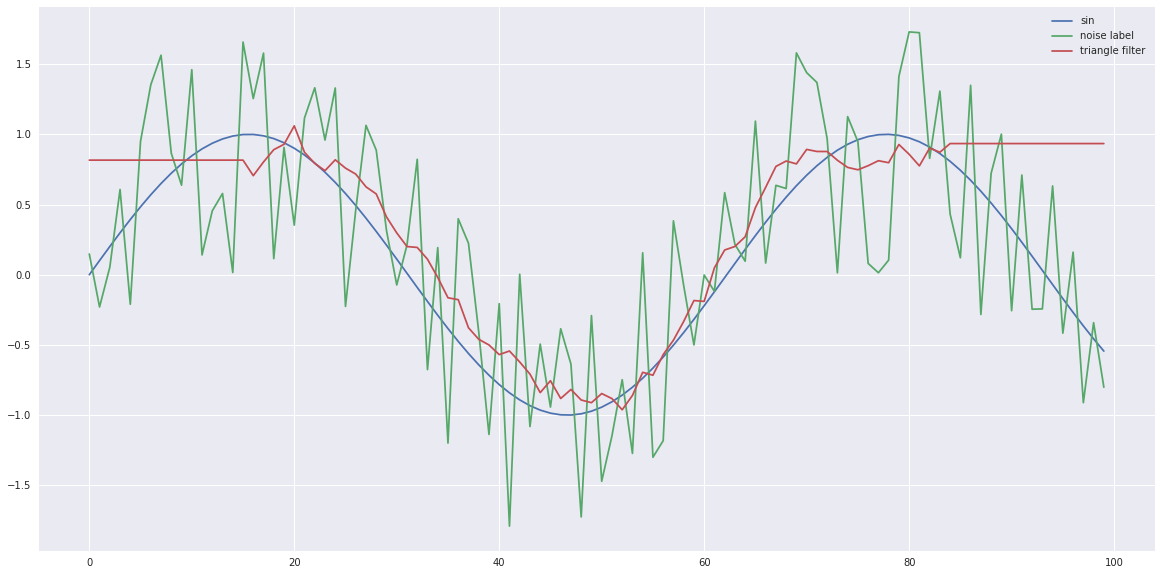

In [10]:
plt.figure(figsize=(20,10))
plt.plot(y,label='sin')
plt.plot(y_noise,label='noise label')
plt.plot(smoothTriangle(y_noise, 10),label='triangle filter')
plt.legend()
plt.show()